<a href="https://colab.research.google.com/github/OmarHisham98/Stereo-Vision-algorithms-Disparity-between-2-images-/blob/main/assignment_3_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This cell is responsible for connecting the notebook with my google drive to access the image
from google.colab import drive
# drive.mount('/content/drive')

def mount():
  drive.flush_and_unmount()
  drive.mount('/content/drive')

mount()

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


## Block Matching

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import argmin
from skimage import io
import math as M



def read_images(path1, path2):
    img1 = cv2.imread(path1)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.imread(path2)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    return img1,img2
def ssd(pix1, pix2):
    res = M.pow(int(pix1-pix2), 2)    
    return res
def sad(pix1, pix2):
    res = abs(pix1-pix2)    
    return res    
def block_matching(img1, img2, window_size,ssd_sad):
    disparity_map = np.zeros(img1.shape, int)
    for row in range(0, img1.shape[0], 1):
        for col in range(0, img1.shape[1], 1):#holding window in image 1
            sums = []
            for col_img2 in range(0, img1.shape[1], window_size):#holding window in image 2
                sum = 0
                for row_wind in range(row, row + window_size, 1):
                    if row_wind >= img1.shape[0]: break
                    for col_wind in range(0, window_size, 1):
                        if col + col_wind >= img1.shape[1] or col_img2+col_wind>=img1.shape[1]: break 
                        else:
                            if(ssd_sad):
                                #print("pixel values in loop:", img1[row_wind][col+col_wind],img2[row_wind][col_img2+col_wind])
                                
                                sum+= ssd(img1[row_wind][col+col_wind],img2[row_wind][col_img2+col_wind])
                            else:
                                sum+= sad(img1[row_wind][col+col_wind],img2[row_wind][col_img2+col_wind])  
                sums.append(sum) 
            match = np.argmin(sums)
            disparity_map[row][col] = abs(col - match)
            # if window_size !=1:
            #   repeater()   
    return disparity_map               
                    
 

In [ ]:
img1, img2 = read_images("/content/drive/MyDrive/vision, ass3/Copy of l1.png","/content/drive/MyDrive/vision, ass3/Copy of r1.png")  
print(np.shape(img1))
print(np.shape(img2))
print("pixel value:", img1[1][1])
    

(289, 382)
(289, 382)
pixel value: 9


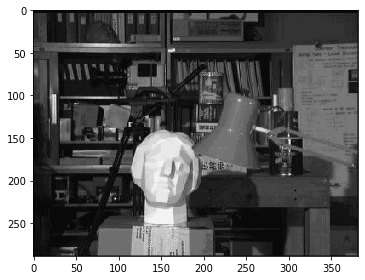

In [ ]:
io.imshow(img1)

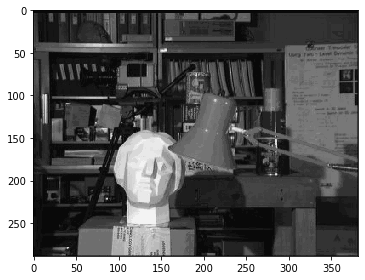

In [ ]:
io.imshow(img2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


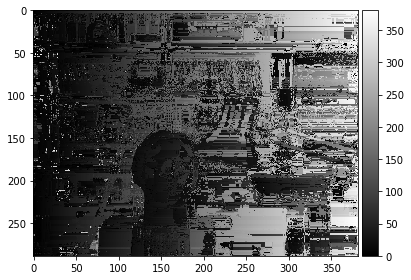

In [ ]:
disparityMap = block_matching(img1, img2, 1, True)
io.imshow(disparityMap,cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


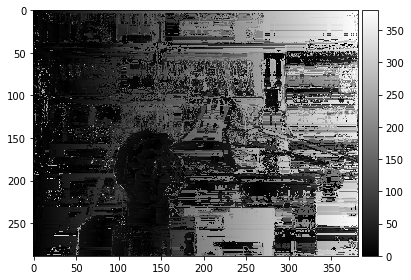

In [ ]:
disparityMap2 = block_matching(img2, img1, 1, True)
io.imshow(disparityMap2,cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


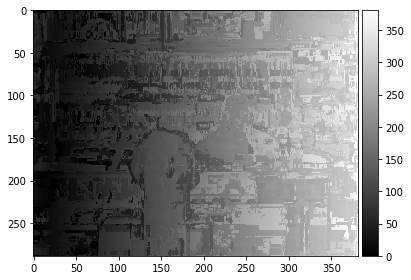

In [ ]:
disparityMap1 = block_matching(img1, img2, 5, True)
io.imshow(disparityMap1,cmap='gray')

In [ ]:
disparityMap3 = block_matching(img1, img2, 9, True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


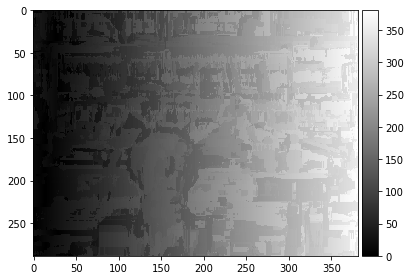

In [ ]:
io.imshow(disparityMap3,cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


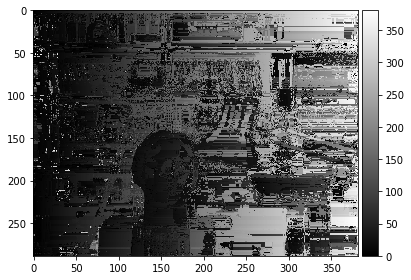

In [ ]:
disparityMap4 = block_matching(img1, img2, 1, False)
io.imshow(disparityMap4,cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


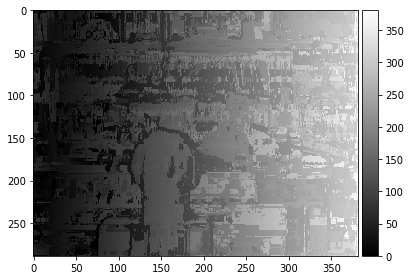

In [ ]:
disparityMap5 = block_matching(img1, img2, 5, False)
io.imshow(disparityMap5,cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


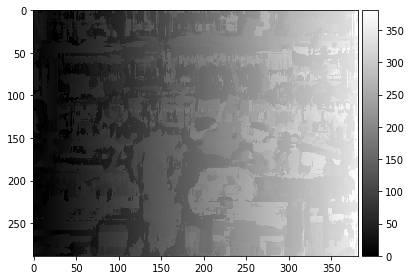

In [ ]:
disparityMap6 = block_matching(img1, img2, 9, False)
io.imshow(disparityMap6,cmap='gray')

## Dynamic Programming

In [ ]:

def cost(pix1, pix2):
    res = M.pow(int(pix1-pix2), 2)
    res = res/4  #division by sigma^2 = 4
    return res



def dynamicMatching(img1Row,img2Row):    

  matrix = np.zeros((np.shape(img1Row)[0],np.shape(img2Row)[0]),int)
  matrix = np.zeros((np.shape(img1Row)[0],np.shape(img2Row)[0]),int)


  # inserting base case data...
  

  matrix[0][0]=cost(img1Row[0],img2Row[0]) 

  for rowDummy in range(0,np.shape(img1Row)[0]):
     matrix[rowDummy][0] = rowDummy+1 
    # matrix[rowDummy][0] = cost(img1Row[rowDummy],img2Row[0])+1 

  for colDummy in range(0,np.shape(img2Row)[0]):

    matrix[0][colDummy] = colDummy+1

    # matrix[0][colDummy] = cost(img1Row[0],img2Row[colDummy])+1


  # applying dynammic programming algorithm 

  for rowIndex in range(1,np.shape(img1Row)[0]):
    for colIndex in range(1,np.shape(img2Row)[0]):
      pixelCost = cost(img1Row[rowIndex],img2Row[colIndex])
      minData=min( matrix[rowIndex-1][colIndex-1]+pixelCost, matrix[rowIndex][colIndex-1]+1 , matrix[rowIndex-1][colIndex]+1 ) 
      matrix[rowIndex][colIndex]=minData



  return matrix,img1Row,img2Row
  # return backTracking(matrix,img1Row,img2Row)







def backTracking(matrix,img1Row,img2Row):

  disparityRow1=np.zeros((np.shape(img1Row)[0]),int)
  disparityRow2=np.zeros((np.shape(img2Row)[0]),int)
  pathList=[]

  # print("matrix : ",matrix)

  rowIndex=np.shape(img1Row)[0]-1
  colIndex=np.shape(img2Row)[0]-1

  while(rowIndex!=0 and colIndex!=0) :
    
    pixelCost = cost(img1Row[rowIndex],img2Row[colIndex])
    pixelValue=matrix[rowIndex][colIndex]

    if pixelValue == matrix[rowIndex-1][colIndex-1]+pixelCost:
      # print("diagonal ")
      pathList.append([rowIndex-1,colIndex-1])

      #updateee
      disparityRow1[rowIndex]=abs(rowIndex-colIndex)
      # print(img1Row[rowIndex]-img2Row[colIndex])
      disparityRow2[colIndex]=abs(rowIndex-colIndex)
      rowIndex=rowIndex-1
      colIndex=colIndex-1
    
    elif  pixelValue == matrix[rowIndex][colIndex-1]+1 :
      pathList.append([rowIndex,colIndex-1])
      disparityRow2[colIndex]=0
      colIndex=colIndex-1

    
    else :
      pathList.append([rowIndex-1,colIndex])
      disparityRow1[rowIndex]=0
      rowIndex=rowIndex-1


  return disparityRow1,disparityRow2,pathList





  



def flagMatrix(matrix):
  flagMatrix = np.zeros(np.shape(matrix),int)
  for row in range(matrix.shape[0]):
    minCol = argmin(matrix[row])
    flagMatrix[row][minCol] = 1 #match is 1


In [ ]:

from matplotlib import pyplot as plt


def executeDMatching():

  disparityMapX=np.zeros(img1.shape,int)
  disparityMapY=np.zeros(img1.shape,int)

  pathPlot=[]


  for rows in range(img1.shape[0]):

    matrix,img1Row,img2Row=dynamicMatching(img1[rows],img2[rows])
    if rows==0:
       print(img1[100])
       print(img2[100])
    disparityRow1,disparityRow2,pathList = backTracking(matrix,img1[rows],img2[rows])

    
    disparityMapX[rows]=disparityRow1
    disparityMapY[rows]=disparityRow2

    pathPlot=pathList


  return disparityMapX,disparityMapY,pathList




  




In [ ]:
disparityMapX,disparityMapY,pathList=executeDMatching()


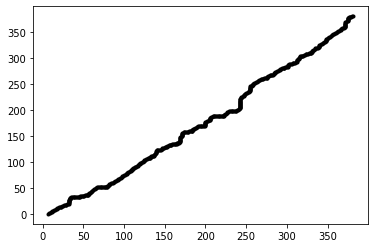

In [ ]:
x_coords = [coord[0] for coord in pathList]
y_coords = [coord[1] for coord in pathList]
plt.plot(x_coords, y_coords, "k.", lw=0)


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 3 3 0]
 [0 0 0 ... 0 0 0]]


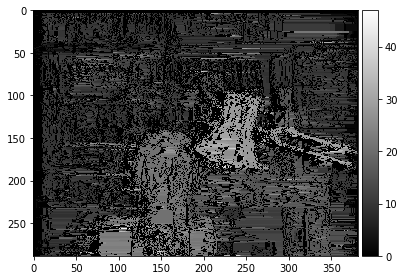

In [ ]:
io.imshow(disparityMapX,cmap="gray")
print(disparityMapX)

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


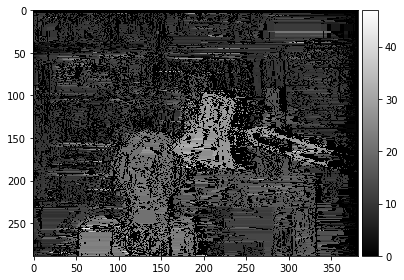

In [ ]:
io.imshow(disparityMapY,cmap="gray")